In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import numpy as np
import koala as kl
from koala.lattice import Lattice
from koala.example_graphs import single_plaquette

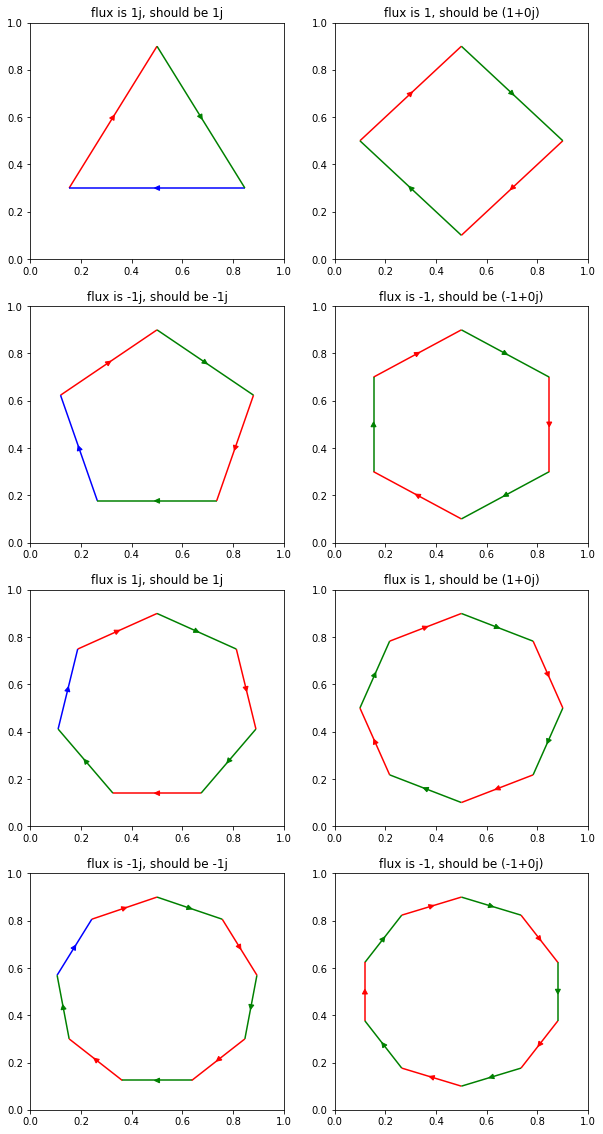

In [16]:
from matplotlib import pyplot as plt
from koala.graph_color import color_lattice
from koala import plotting as pl
# from koala.flux_finder import fluxes_from_bonds


def fluxes_from_bonds(l, bonds) -> np.ndarray:
    """
    Given a lattice l and a set of bonds = +/-1 defined on the edges of the lattice, calculate the fluxes.
    The fluxes are defined on each plaquette as the the product of each bond in the direction,
    with the sign fliped otherwise.

    :param l: The lattice.
    :type l: Lattice
    :param bonds: The bond variables +1 or -1
    :type bonds: np.ndarray
    :return: fluxes
    :rtype: np.ndarray
    """
    fluxes = np.zeros(len(l.plaquettes), dtype = 'int')
    for i, p in enumerate(l.plaquettes):
        bond_signs = bonds[p.edges] #the signs of the bonds around this plaquette
        bond_directions = 1 - 2*p.directions #the direction of each edge expressed as +/- 1

        sign_real = np.array([1,-1,-1,1])
        sign = sign_real[p.n_sides%4]

        # fluxes[i] = (1j**p.n_sides)*np.product(bond_signs * bond_directions)
        fluxes[i] = sign*np.product(bond_signs * bond_directions)
    return fluxes


lattices = []

for n in range(3,11):
    lattices.append(single_plaquette(n))

n_lattices = len(lattices)

rows = int(np.ceil(n_lattices/2))
fig,axes = plt.subplots(rows, 2  ,figsize=  (10,10*rows/2))

for n, lat in enumerate(lattices):

    c = color_lattice(lat)
    ujk = np.full(lat.n_edges, 1)

    flux = fluxes_from_bonds(lat, ujk)

    pl.plot_lattice(lat,edge_labels= c, edge_arrows=True, ax = axes.flatten()[n])
    if lat.n_edges%2 == 0:
        j = ''
    else:
        j = 'j'

    axes.flatten()[n].set_title(f'flux is {flux[0]}' + j +  f', should be {(-1j)**lat.n_edges}')


    

